In [54]:
# MLPClassifier（多层感知器分类器）
# 官方文档说明书: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# 相关公式推导: https://blog.csdn.net/xholes/article/details/78461164

# INTRODUCTION:
# 不能支持GPU
# 只支持交叉熵损失函数("Currently, MLPClassifier supports only the Cross-Entropy loss function")
# 使用softmax函数来表现预测结果概率.要得到概率,可调用"predict_proba"函数
# 支持一样例多标签的分类
# 参数alpha用以正则化(L2 regularization),来惩罚权重.
# scale化.均值变1,方差变0
# 热启动与监控
import pprint
import warnings

In [38]:
# 官方示例
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

print('权重矩阵:\n', clf.coefs_, sep='')
print('权重矩阵大小: ', [coef.shape for coef in clf.coefs_], sep='')
print('偏置b:\n', clf.intercepts_, sep='')
print('偏置b大小: ', [intercept.shape for intercept in clf.intercepts_], sep='')

print('预测结果:')
print(clf.predict([[2., 2.], [-1., -2.]]))
print(clf.predict_proba([[2., 2.], [-1., -2.]]))

权重矩阵:
[array([[-0.14196276, -0.02104562, -0.85522848, -3.51355396, -0.60434709],
       [-0.69744683, -0.9347486 , -0.26422217, -3.35199017,  0.06640954]]), array([[ 0.29164405, -0.14147894],
       [ 2.39665167, -0.6152434 ],
       [-0.51650256,  0.51452834],
       [ 4.0186541 , -0.31920293],
       [ 0.32903482,  0.64394475]]), array([[-4.53025854],
       [-0.86285329]])]
权重矩阵大小: [(2, 5), (5, 2), (2, 1)]
偏置b:
[array([-0.14962269,  0.75950271, -0.5472481 ,  6.92417703, -0.87510813]), array([-0.47635084, -0.76834882]), array([8.53354251])]
偏置b大小: [(5,), (2,), (1,)]
预测结果:
[1 0]
[[1.96718015e-004 9.99803282e-001]
 [1.00000000e+000 4.67017947e-144]]


In [46]:
# 支持一样例多标签的分类的示例:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X, y)
print(clf.predict_proba([[1., 2.]]), 'predicted as: ', clf.predict([[1., 2.]]))
print(clf.predict_proba([[0., 0.]]), 'predicted as: ', clf.predict([[0., 0.]]))

[[0.99999999 1.        ]] predicted as:  [[1 1]]
[[7.67594868e-05 9.99992280e-01]] predicted as:  [[0 1]]


Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.986800
Test set score: 0.970000


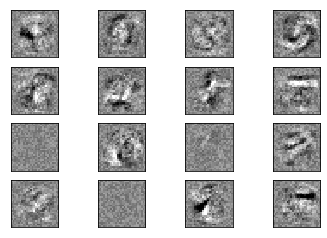

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

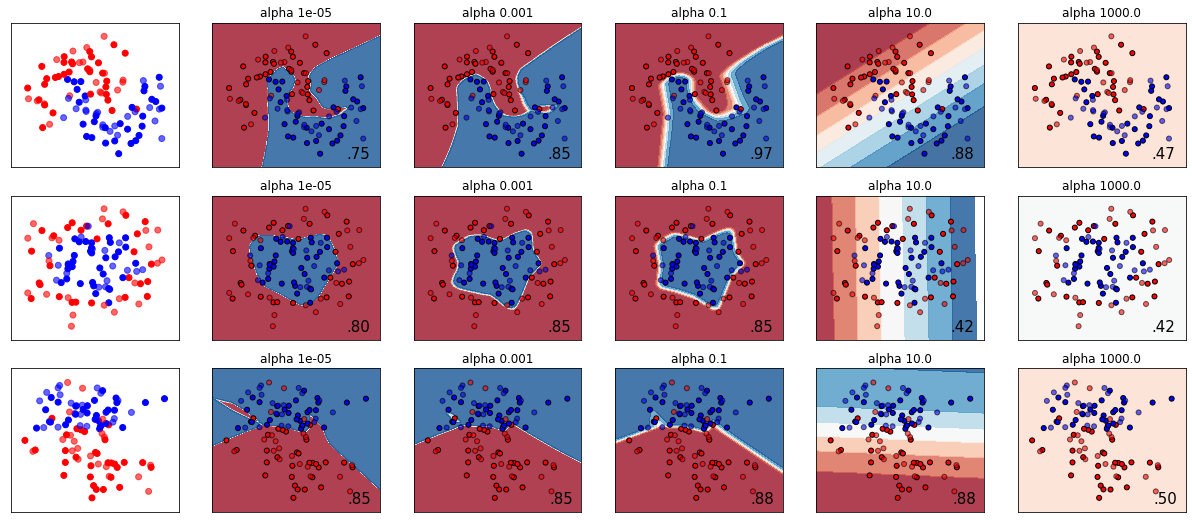

In [52]:
# 正则化惩罚

# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                     hidden_layer_sizes=[100, 100]))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [69]:
# 标准化数据. 均值变成0,方差变成1
# Scale的方法有: Minmaxscaler, robustscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)


In [61]:
# 热启动与监控
X = [[0., 0.], [1., 1.]]
y = [0, 1]
# 通过max_iter=1, warm_start=True实现
clf = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True)
for i in range(10):
    clf.fit(X, y)
    print(clf.predict_proba([[-1., -2.]]))
    # additional monitoring / inspection


[[0.91340593 0.08659407]]
[[0.91342648 0.08657352]]
[[0.91344597 0.08655403]]
[[0.91357357 0.08642643]]
[[0.91370388 0.08629612]]
[[0.91383162 0.08616838]]
[[0.91395728 0.08604272]]
[[0.91407891 0.08592109]]
[[0.91419703 0.08580297]]
[[0.91431204 0.08568796]]


D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
